In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

preDouble = "\\\\iobsdc01\\SharedDocs\\SEER_MEDICARE\\SEER_MEDICARE_STAGING"
new = os.chdir(preDouble)
#print(preDouble)

In [2]:
import pickle
fileObject = open('control_indicies.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
controlindices = list(b)

In [3]:
import pickle
fileObject = open('treatment_indicies.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
treatmentindices = list(b)

In [4]:
df = pd.read_pickle('dfpedsfFirsts.pickle')

In [5]:
mask = (df['srvm1'] != 9999)
dfall = df[mask]


In [6]:
geomask = (dfall['elevation_1'] != dfall['FIPScombo_1']) 

dfall = dfall[geomask].copy()


In [7]:
dfall['elevation_1'].replace('99999',np.nan,inplace=True)
dfall['elevation_2'].replace('99999',np.nan,inplace=True)
dfall['elevation_3'].replace('99999',np.nan,inplace=True)

dfall['lat_1'].replace('99999',np.nan,inplace=True)
dfall['lat_2'].replace('99999',np.nan,inplace=True)
dfall['lat_3'].replace('99999',np.nan,inplace=True)

dfall['lng_1'].replace('99999',np.nan,inplace=True)
dfall['lng_2'].replace('99999',np.nan,inplace=True)
dfall['lng_3'].replace('99999',np.nan,inplace=True)

dfall['elevation_1'] = dfall['elevation_1'].astype('float')
dfall['elevation_2'] = dfall['elevation_2'].astype('float')
dfall['elevation_3'] = dfall['elevation_3'].astype('float')

dfall['lat_1'] = dfall['lat_1'].astype('float')
dfall['lat_2'] = dfall['lat_2'].astype('float')
dfall['lat_3'] = dfall['lat_3'].astype('float')

dfall['lng_1'] = dfall['lng_1'].astype('float')
dfall['lng_2'] = dfall['lng_2'].astype('float')
dfall['lng_3'] = dfall['lng_3'].astype('float')

In [8]:
dfall.set_index('patient_id', inplace=True,drop=False)

In [9]:
dfall.patient_id.isin(treatmentindices).sum()

916

In [10]:
dfall.patient_id.isin(controlindices).sum()

916

In [11]:
dfall.shape

(719821, 496)

In [12]:
dfalltreatment = dfall.loc[treatmentindices].copy()
dfallcontrol = dfall.loc[controlindices].copy()

In [13]:
dfalltreatment.shape

(916, 496)

In [14]:
dfallcontrol.shape

(916, 496)

In [15]:
lung_filter_all = dfall.site1.str.contains('lung',case=False,na=False) | \
              dfall.site1.str.contains('bronchus',case=False,na=False)
    
lung_filter_treatment = dfalltreatment.site1.str.contains('lung',case=False,na=False) | \
              dfalltreatment.site1.str.contains('bronchus',case=False,na=False)
    
lung_filter_control = dfallcontrol.site1.str.contains('lung',case=False,na=False) | \
              dfallcontrol.site1.str.contains('bronchus',case=False,na=False)
    
    

prostate_filter_all = dfall.site1.str.contains('prostate',case=False,na=False) | \
              dfall.site1.str.contains('prostate',case=False,na=False)
    
prostate_filter_treatment = dfalltreatment.site1.str.contains('prostate',case=False,na=False) | \
              dfalltreatment.site1.str.contains('prostate',case=False,na=False)
    
prostate_filter_control = dfallcontrol.site1.str.contains('prostate',case=False,na=False) | \
              dfallcontrol.site1.str.contains('prostate',case=False,na=False)
    
    
eye_filter_all = dfall.site1.str.contains('choroid',case=False,na=False) | \
              dfall.site1.str.contains('ciliary',case=False,na=False) | \
             dfall.site1.str.contains('retina',case=False,na=False)
    
eye_filter_treatment = dfalltreatment.site1.str.contains('choroid',case=False,na=False) | \
              dfalltreatment.site1.str.contains('ciliary',case=False,na=False) | \
              dfalltreatment.site1.str.contains('retina',case=False,na=False)
    
eye_filter_control = dfallcontrol.site1.str.contains('choroid',case=False,na=False) | \
              dfallcontrol.site1.str.contains('ciliary',case=False,na=False) | \
             dfallcontrol.site1.str.contains('retina',case=False,na=False)
        
        
        
brain_filter_all = dfall.site1.str.contains('cerebral',case=False,na=False) | \
              dfall.site1.str.contains('frontal',case=False,na=False) | \
             dfall.site1.str.contains('temporal',case=False,na=False) | \
           dfall.site1.str.contains('parietal',case=False,na=False)
    
brain_filter_treatment = dfalltreatment.site1.str.contains('cerebral',case=False,na=False) | \
              dfalltreatment.site1.str.contains('frontal',case=False,na=False) | \
              dfalltreatment.site1.str.contains('temporal',case=False,na=False) | \
             dfalltreatment.site1.str.contains('parietal',case=False,na=False)
    
brain_filter_control = dfallcontrol.site1.str.contains('cerebral',case=False,na=False) | \
              dfallcontrol.site1.str.contains('frontal',case=False,na=False) | \
             dfallcontrol.site1.str.contains('temporal',case=False,na=False) | \
        dfallcontrol.site1.str.contains('parietal',case=False,na=False)
        
        
head_and_neck_filter_all = dfall.site1.str.contains('parotid',case=False,na=False) | \
              dfall.site1.str.contains('esophagus',case=False,na=False) | \
             dfall.site1.str.contains('acoustic nerve',case=False,na=False) 
    
head_and_neck_filter_treatment = dfalltreatment.site1.str.contains('parotid',case=False,na=False) | \
              dfalltreatment.site1.str.contains('esophagus',case=False,na=False) | \
              dfalltreatment.site1.str.contains('acoustic nerve',case=False,na=False) 
    
head_and_neck_filter_control = dfallcontrol.site1.str.contains('parotid',case=False,na=False) | \
              dfallcontrol.site1.str.contains('esophagus',case=False,na=False) | \
             dfallcontrol.site1.str.contains('acoustic nerve',case=False,na=False) 
        
        
breast_filter_all = dfall.site1.str.contains('breast',case=False,na=False) 
    
breast_filter_treatment = dfalltreatment.site1.str.contains('breast',case=False,na=False)
    
breast_filter_control = dfallcontrol.site1.str.contains('breast',case=False,na=False)  


In [16]:
catcols = ['m_sex','marst1','srace','nhiade','grade1',
           'site1',
          'histrec1',
           'modx1','stat_rec']


goodcols = ['m_sex','marst1', 'srace','nhiade',
           'grade1','site1',
           'lat1','histrec1',
           'modx1','stat_rec','birthyr',
           'agedx1',
           'yrdx1','elevation_1',
           'lng_1']

In [17]:
resgoodcontrol = pd.concat([pd.get_dummies(dfallcontrol[col],prefix=col) for col in catcols], axis=1)

resgoodtreatment = pd.concat([pd.get_dummies(dfalltreatment[col],prefix=col) for col in catcols], axis=1)

resgoodpop = pd.concat([pd.get_dummies(dfall[col],prefix=col) for col in catcols], axis=1)

In [18]:
resgoodcontrol['birthyr'] = dfallcontrol['birthyr']
resgoodcontrol['agedx1'] = dfallcontrol['agedx1']

resgoodcontrol['yrdx1'] = dfallcontrol['yrdx1']

resgoodcontrol['lat_1'] = dfallcontrol['lat_1']

resgoodcontrol['lng_1'] = dfallcontrol['lng_1']

resgoodcontrol['srvm1'] = dfallcontrol['srvm1']

resgoodcontrol['elevation_1'] = dfallcontrol['elevation_1']

In [19]:
resgoodtreatment['birthyr'] = dfalltreatment['birthyr']
resgoodtreatment['agedx1'] = dfalltreatment['agedx1']

resgoodtreatment['yrdx1'] = dfalltreatment['yrdx1']



resgoodtreatment['lat_1'] = dfalltreatment['lat_1']

resgoodtreatment['lng_1'] = dfalltreatment['lng_1']

resgoodtreatment['srvm1'] = dfalltreatment['srvm1']

resgoodtreatment['elevation_1'] = dfalltreatment['elevation_1']

In [20]:
resgoodpop['birthyr'] = dfall['birthyr']
resgoodpop['agedx1'] = dfall['agedx1']

resgoodpop['yrdx1'] = dfall['yrdx1']




resgoodpop['lat_1'] = dfall['lat_1']

resgoodpop['lng_1'] = dfall['lng_1']

resgoodpop['srvm1'] = dfall['srvm1']

resgoodpop['elevation_1'] = dfall['elevation_1']

In [21]:
beamfilter = dfall.rad1.str.contains('beam radiation',case=False,na=False)

# <font color="#E56717">Kaplan-Meier Survival Curves</font> 

# <font color="#E56717">Kaplan-Meier Survival Curves after performing the patient matching</font>

<span style="font-size:1.5em;">Below we will show the Kaplan-Meier survival curves for the group of PBT patients and the corresponding group of matched controls who received any other form of RT</span>

* <span style="font-size:1.5em;">Just prostate cancer: PBT is better</span>
* <span style="font-size:1.5em;">Eye and Orbit</span>
* <span style="font-size:1.5em;">Lung: PBT is better</span>
* <span style="font-size:1.5em;">Brain</span>
* <span style="font-size:1.5em;">Head and Neck</span>
* <span style="font-size:1.5em;">Breast</span>

In [28]:
breast_filter_treatment.sum()

7

# <font color="#E56717">Broad Grouping Counts</font>

| Group | count |
|-------|-------:|
|prostate | 857 |
| lung | 28 |
| eye and orbit | 18 |
| brain | 3 |
| head and neck | 3 |
| breast | 7 | 

# <font color="#E56717">Distribution of sites</font>

| site | count | 
|------|----------:|
|Prostate gland                   | 857|
|Upper lobe, lung                  | 22|
|Choroid                           | 18|
|Lower lobe, lung                  |  5|
|Upper-outer quadrant of breast     | 3|
|Lower third of esophagus           | 2|
|Lower-inner quadrant of breast     | 2|
|Overlapping lesion of breast       | 2|
|Frontal lobe                       | 1|
|Lung, NOS                          | 1|
|Parietal lobe                      | 1|
|Temporal lobe                      | 1|
|Parotid gland                      | 1|

In [29]:
dfalltreatment.site1.value_counts()

Prostate gland                    857
Upper lobe, lung                   22
Choroid                            18
Lower lobe, lung                    5
Upper-outer quadrant of breast      3
Lower-inner quadrant of breast      2
Overlapping lesion of breast        2
Lower third of esophagus            2
Temporal lobe                       1
Lung, NOS                           1
Parietal lobe                       1
Frontal lobe                        1
Parotid gland                       1
Name: site1, dtype: int64

# <font color="#E56717">Lung Cancer</font>

In [30]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodcontrol[lung_filter_control]["srvm1"]
Econtrol = resgoodcontrol[lung_filter_control]["stat_rec_Dead"]

Ttreatment = resgoodtreatment[lung_filter_treatment]["srvm1"]
Etreatment = resgoodtreatment[lung_filter_treatment]["stat_rec_Dead"]

Tpop = resgoodpop[lung_filter_all & beamfilter]["srvm1"]
Epop = resgoodpop[lung_filter_all & beamfilter]["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Lung Cancer (all beam radiation treatment modalities) group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PBT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PBT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 28 observations, 9 censored>

(0, 60)

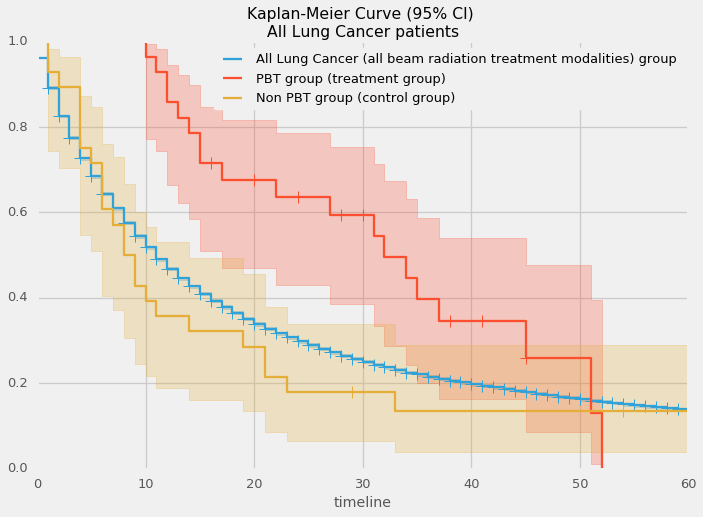

In [31]:
ax = kmfpop.plot(show_censors=True)
kmftreatment.plot(ax=ax,show_censors=True)
kmfcontrol.plot(ax=ax,show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nAll Lung Cancer patients");
plt.xlim(0,60)

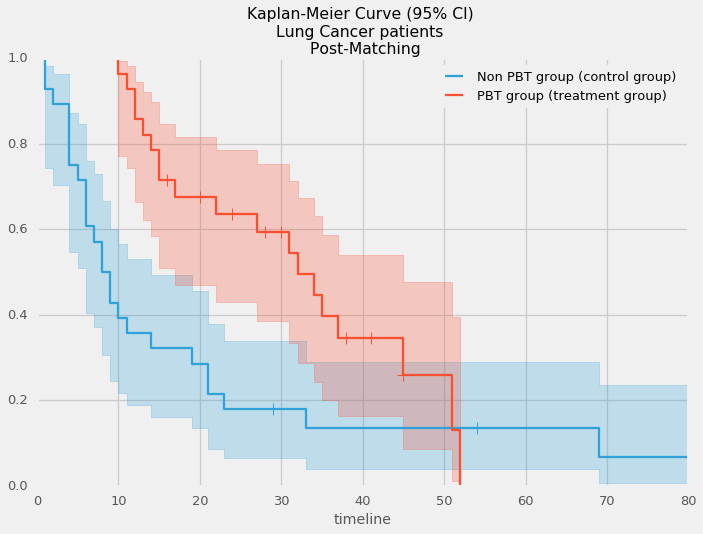

In [32]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax, show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nLung Cancer patients \n Post-Matching");

In [33]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   t 0: -1
   null distribution: chi squared
   alpha: 0.95
   df: 1
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00484 |              7.937 |      Reject Null    |        True       


# <font color="#E56717">Prostate Cancer</font>



In [34]:

from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodcontrol[prostate_filter_control]["srvm1"]
Econtrol = resgoodcontrol[prostate_filter_control]["stat_rec_Dead"]

Ttreatment = resgoodtreatment[prostate_filter_treatment]["srvm1"]
Etreatment = resgoodtreatment[prostate_filter_treatment]["stat_rec_Dead"]

Tpop = resgoodpop[prostate_filter_all & beamfilter]["srvm1"]
Epop = resgoodpop[prostate_filter_all & beamfilter]["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Prostate Cancer (all beam radiation treatment modalities) group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PBT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PBT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 857 observations, 807 censored>

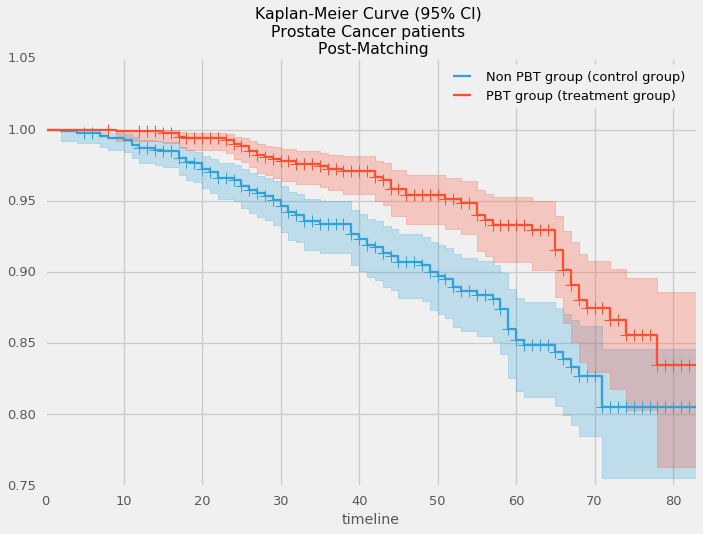

In [35]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax, show_censors=True)
#kmfpop.plot(ax=ax, show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nProstate Cancer patients \n Post-Matching");

In [36]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   t 0: -1
   null distribution: chi squared
   alpha: 0.95
   df: 1
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00040 |             12.548 |      Reject Null    |        True       


# <font color="#E56717">Eye and Orbit</font>



In [37]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodcontrol[eye_filter_control]["srvm1"]
Econtrol = resgoodcontrol[eye_filter_control]["stat_rec_Dead"]

Ttreatment = resgoodtreatment[eye_filter_treatment]["srvm1"]
Etreatment = resgoodtreatment[eye_filter_treatment]["stat_rec_Dead"]

Tpop = resgoodpop[eye_filter_all & beamfilter]["srvm1"]
Epop = resgoodpop[eye_filter_all & beamfilter]["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Eye and Orbit Cancer (all beam radiation treatment modalities) group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 18 observations, 10 censored>

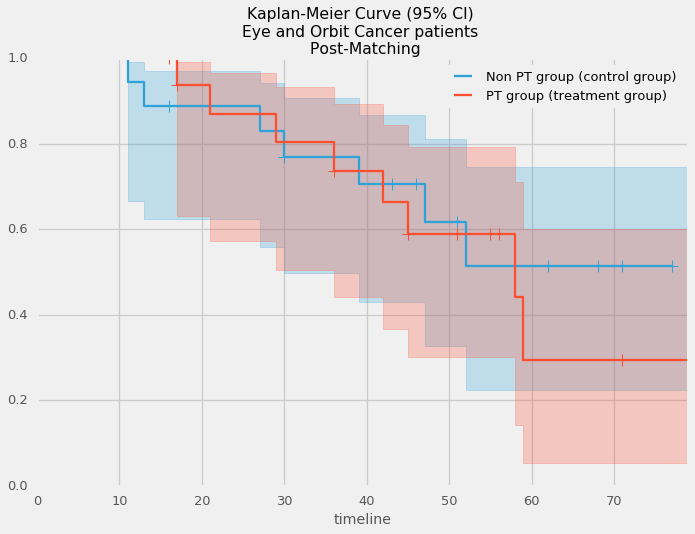

In [38]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax, show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nEye and Orbit Cancer patients \n Post-Matching");

In [39]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   t 0: -1
   null distribution: chi squared
   alpha: 0.95
   df: 1
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.65484 |              0.200 |  Cannot Reject Null |       False       


# <font color="#E56717">Brain Cancer</font>

In [40]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodcontrol[brain_filter_control]["srvm1"]
Econtrol = resgoodcontrol[brain_filter_control]["stat_rec_Dead"]

Ttreatment = resgoodtreatment[brain_filter_treatment]["srvm1"]
Etreatment = resgoodtreatment[brain_filter_treatment]["stat_rec_Dead"]

Tpop = resgoodpop[brain_filter_all & beamfilter]["srvm1"]
Epop = resgoodpop[brain_filter_all & beamfilter]["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Brain Cancer (all beam radiation treatment modalities) group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 3 observations, 0 censored>

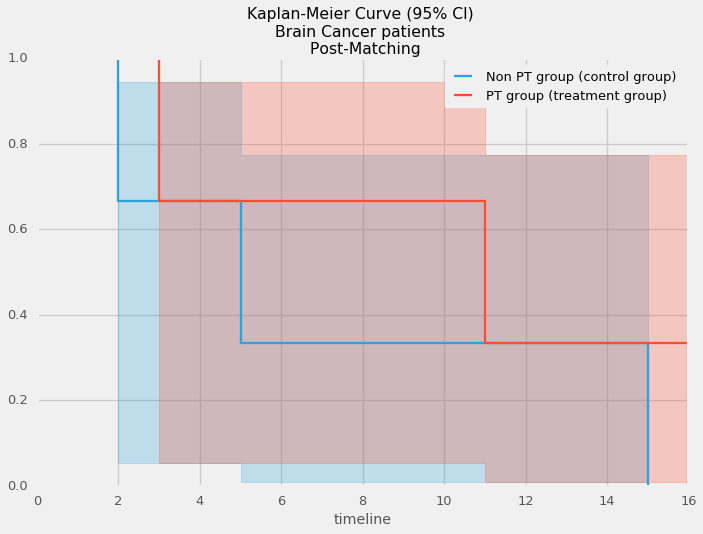

In [41]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax, show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nBrain Cancer patients \n Post-Matching");

In [42]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   t 0: -1
   null distribution: chi squared
   alpha: 0.95
   df: 1
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.48622 |              0.485 |  Cannot Reject Null |       False       


# <font color="#E56717">Head and Neck Cancer</font>

In [43]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodcontrol[head_and_neck_filter_control]["srvm1"]
Econtrol = resgoodcontrol[head_and_neck_filter_control]["stat_rec_Dead"]

Ttreatment = resgoodtreatment[head_and_neck_filter_treatment]["srvm1"]
Etreatment = resgoodtreatment[head_and_neck_filter_treatment]["stat_rec_Dead"]

Tpop = resgoodpop[head_and_neck_filter_all & beamfilter]["srvm1"]
Epop = resgoodpop[head_and_neck_filter_all & beamfilter]["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Head and Neck Cancer (all beam radiation treatment modalities) group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 3 observations, 0 censored>

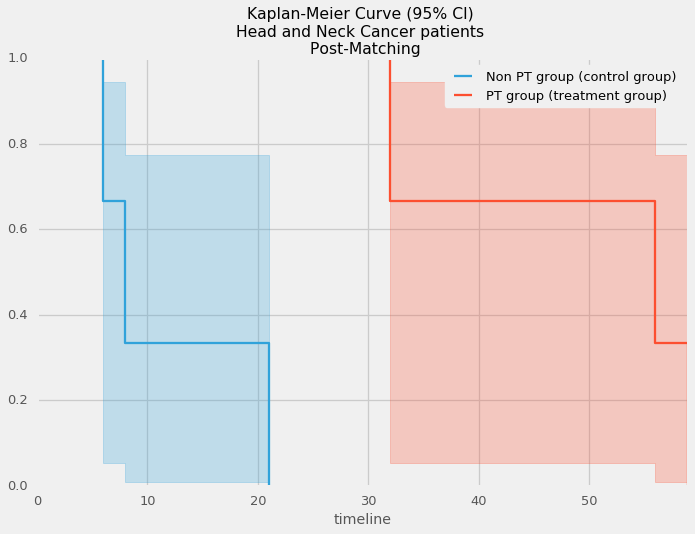

In [44]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax, show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nHead and Neck Cancer patients \n Post-Matching");

In [45]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   t 0: -1
   null distribution: chi squared
   alpha: 0.95
   df: 1
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.02460 |              5.052 |      Reject Null    |        True       


In [46]:
Tcontrol

patient_id
8792067479     6
4408106073     8
8882020381    21
Name: srvm1, dtype: int64

# <font color="#E56717">Breast Cancer</font>

In [47]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodcontrol[breast_filter_control]["srvm1"]
Econtrol = resgoodcontrol[breast_filter_control]["stat_rec_Dead"]

Ttreatment = resgoodtreatment[breast_filter_treatment]["srvm1"]
Etreatment = resgoodtreatment[breast_filter_treatment]["stat_rec_Dead"]

Tpop = resgoodpop[breast_filter_all & beamfilter]["srvm1"]
Epop = resgoodpop[breast_filter_all & beamfilter]["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Breast Cancer (all beam radiation treatment modalities) group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 7 observations, 6 censored>

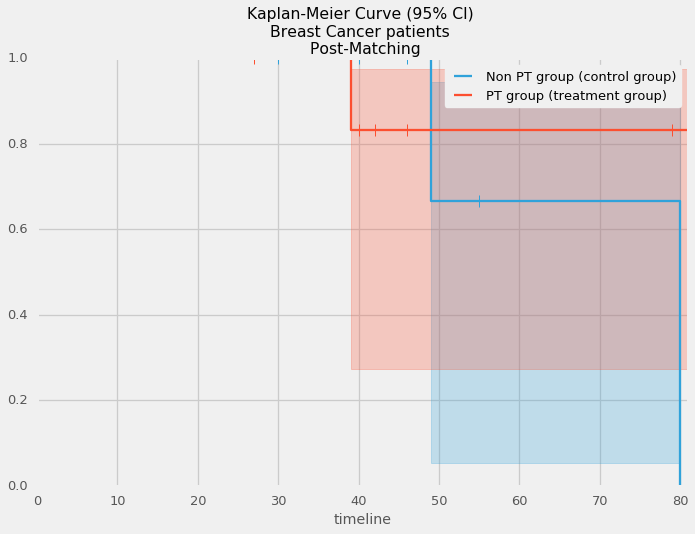

In [48]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax, show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nBreast Cancer patients \n Post-Matching");

In [49]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   t 0: -1
   null distribution: chi squared
   alpha: 0.95
   df: 1
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.64194 |              0.216 |  Cannot Reject Null |       False       
